In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ML Zoomcamp project (Zabolotin Roman)

I took dataset from here: https://www.kaggle.com/datasets/yashpaloswal/ann-car-sales-price-prediction

Dataset description:

**ANN - Car Sales Price Prediction**

**Main Context:**  
As a vehicle salesperson, you would like to create a model that can estimate the overall amount that consumers would spend given the following characteristics:
customer name, customer email, country, gender, age, annual salary, credit card debt, and net worth

**The model should anticipate the following (Problem Statement):**  
Amount Paid for a Car

**Task type:**  
Regression

**Algorithm:**  
The given problem statement can be solved using Machine Learning or Deep Learning Techniques


In this project I created a service that predicts how much a client can spent to buy a new car

# Load data and preprocessing

In [2]:
df = pd.read_csv("../data/car_purchasing.csv",encoding='ISO-8859-1')

In [3]:
df.head(3)

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921


In [47]:
df.columns = df.columns.str.replace(" ", "_").str.replace("-","").str.lower()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_name        500 non-null    object 
 1   customer_email       500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual_Salary        500 non-null    float64
 6   credit_card_debt     500 non-null    float64
 7   net_worth            500 non-null    float64
 8   car_purchase_amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [14]:
df.describe()

,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


# EDA

## Target value - car_purchase_amount

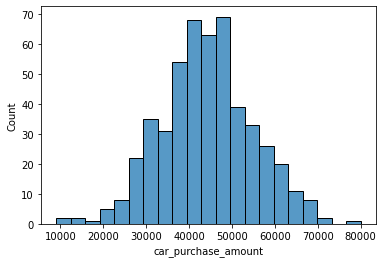

In [17]:
sns.histplot(df.car_purchase_amount);

Looks lika a normal distribution   
We don't need to change it


## Customer name, customer email (sting values)

In [21]:
df.customer_name.sample(40)

474                    Avye
274        Hammett F. Marsh
239           Zane I. Boone
152           Rashad Harper
238         Callum U. Sweet
334      Hudson, Maxwell F.
455                 Tamekah
335           Levy, Irma P.
28            Gemma Hendrix
443               Aristotle
105        Dominic Mcintosh
170          Graiden Powell
340        Powers, Naomi B.
284       Odette Q. Sherman
320       Wise, Mechelle E.
200         Tiger I. Melton
353          Ortiz, Drew P.
448                   Wayne
115         Quamar Cummings
445                 Urielle
255          Damon K. Boone
439                Demetria
422                    Reed
466                   India
51            Leilani Gross
162         Trevor Faulkner
213          Velma K. Moses
26               Ulric Lynn
220           Lynn S. Avery
240      Timothy J. Terrell
477                Isabella
149              Orson Hyde
119             Dean Snider
82             Abel Stanton
328    Sexton, Shaeleigh H.
211        Emerald R

In [22]:
df.customer_name.value_counts()

Seth                    2
Walter                  2
Martina Avila           1
Sexton, Shaeleigh H.    1
Holloway, Brennan Q.    1
                       ..
Holmes Irwin            1
Hector Price            1
Sebastian Marks         1
Marvin Garner           1
Marla                   1
Name: customer_name, Length: 498, dtype: int64

In [26]:
df.customer_email.sample(40)

381    ornare.egestas.ligula@urnaVivamusmolestie.com
119                                    tempus@sit.ca
124                  Cras.lorem@nonvestibulumnec.net
372                    ut.aliquam@egetlacusMauris.ca
54                lectus.a.sollicitudin@tortorat.net
245                      consequat.nec.mollis@nec.ca
313       vestibulum.nec.euismod@netusetmalesuada.ca
470     purus.ac.tellus@parturientmontesnascetur.org
367                               lacinia@posuere.ca
304       luctus.lobortis.Class@sitametdapibus.co.uk
59                      Class.aptent@torquentper.com
487                    porttitor.tellus@elitelit.org
146                               eu.ultrices@In.edu
315                         nec.tellus@lacinia.co.uk
173                                 auctor@ipsum.org
37                       ultrices@Integersemelit.com
377                     sit.amet@dignissimmagnaa.edu
46               Vivamus.nisi.Mauris@miAliquam.co.uk
222                        aliquet@volutpatNul

We can use the lastdomain name from email  
for example:  
pellentesque.a.facilisis@nonlacinia.co.uk -> .co.uk  
Cras.eu@vitaevelitegestas.net -> .net  
  
Maybe it can be usefull

## Country

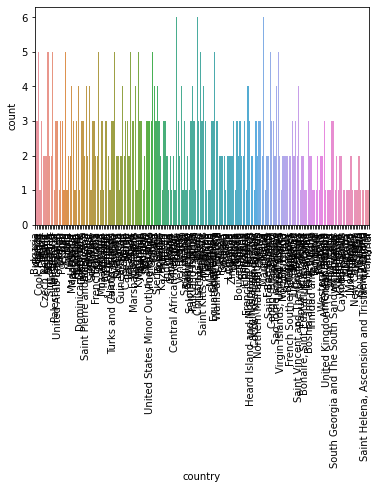

In [36]:
sns.countplot(x=df.country);
plt.xticks(rotation=90);
plt.show();

There are very huge amount of countries, we need reduce it's amount.  
For this purpuse we can find external datasets.

## Gender

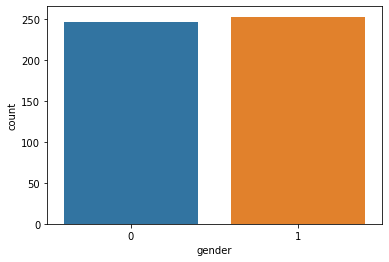

In [37]:
sns.countplot(x=df.gender);

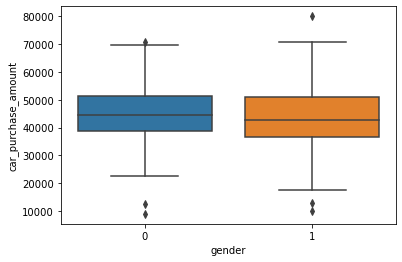

In [38]:
sns.boxplot(x=df.gender, y=df.car_purchase_amount);

## Age

In [43]:
df.age = df.age.values.astype(int)

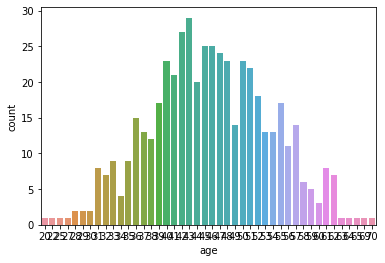

In [44]:
sns.countplot(x=df.age);

We can use it as numerical feature

## Annual salary

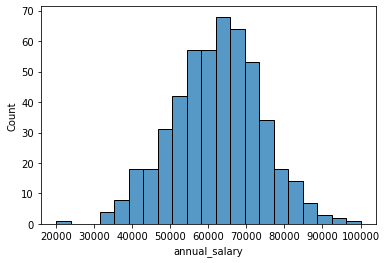

In [49]:
sns.histplot(df.annual_salary);

## Credit card dept

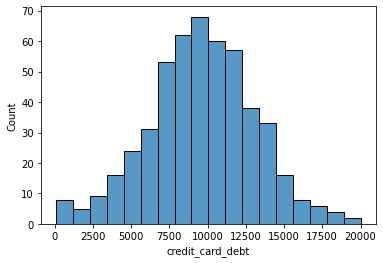

In [52]:
sns.histplot(df.credit_card_debt);

## Net worth

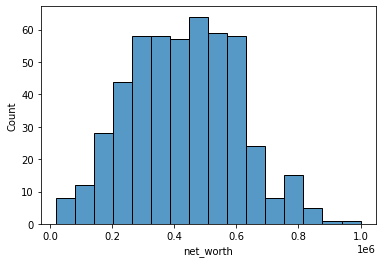

In [54]:
sns.histplot(df.net_worth);

In [56]:
df.net_worth.describe()

count        500.000000
mean      431475.713625
std       173536.756340
min        20000.000000
25%       299824.195900
50%       426750.120650
75%       557324.478725
max      1000000.000000
Name: net_worth, dtype: float64

## Let's look for correlation matrix

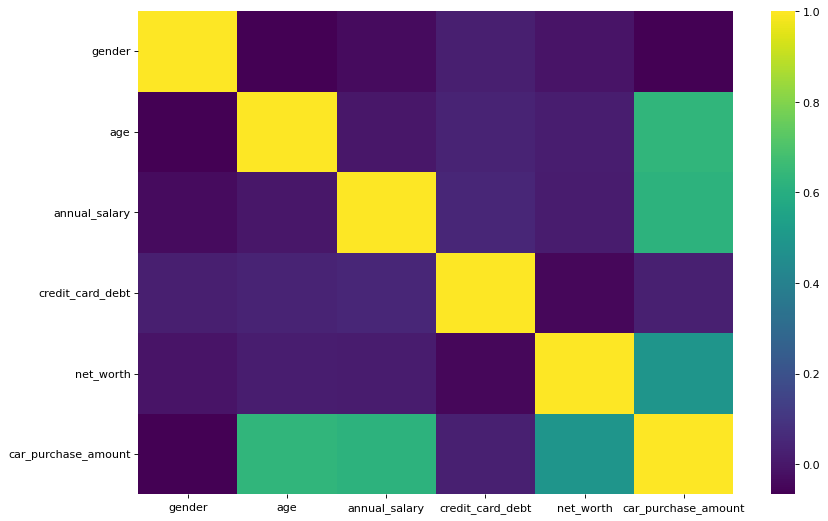

In [68]:
corr_table = df.select_dtypes(include=['int', 'float']).corr()
plt.figure(figsize=(12, 8), dpi=80)
sns.heatmap(corr_table, cmap='viridis');

**Very correlated columns are:**

- age|car_purchase_amount
- annual_salary|car_purchase_amount

# Conclusion

1. It's a very small dataset, but I'll try create a usefull model with him
2. Target variable is very correlated with age and anual salary (what makes sense)
3. We need external data about countries, to gain more information about customer (such as continent, GDP)


# Next part: Data preporation